<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/CarPricePredction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
#libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

#libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

#libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#Data import

In [326]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

#Exploratory Data Analysis

In [327]:
df.shape

(205, 26)

In [328]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [330]:
#Cleaning data - dropping the car ID field as it is irrelevant

df = df.drop('car_ID',axis=1)

In [331]:
df_null = df.isna().mean().round(4)*100
df_null.sort_values(ascending = False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

In [332]:
df.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

(205, 25)

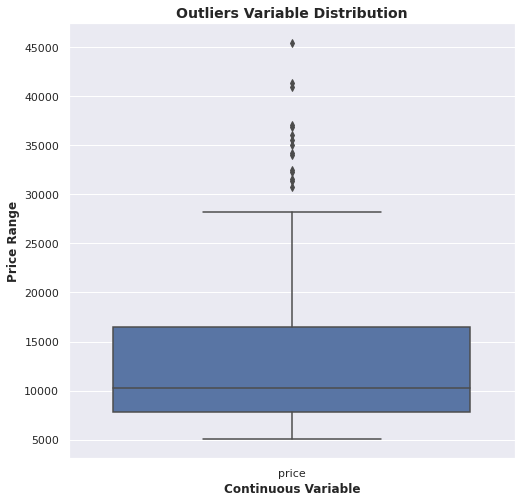

In [333]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

In [334]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]

In [335]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Brands / Spelling errors in CarNames:
- alfa-romero
- audi
- bmw
- chevrolet
- dodge
- honda
- isuzu
- jaguar
- mazda (maxda)
- buick
- mercury
- mitsubishi
- Nissan (nissan)
- peugeot
- plymouth
- porsche (porcshce)
- renault
- saab
- subaru
- toyota(toyouta)
- volkswagen(vw , vokswagen)
- volvo

In [336]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [338]:
#reassigning the dtype for symboling as categorical (as per data dictionary)
df['symboling'] = df['symboling'].astype(str)

In [339]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [340]:
#segregating data into numeric and categorical based on dtypes
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

#Visualizing the data

Text(0, 0.5, 'Count of Cars')

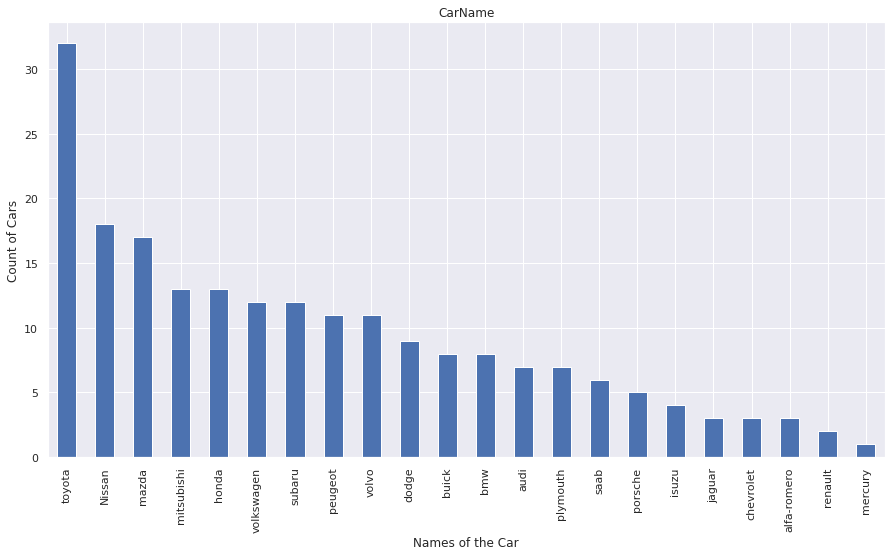

In [341]:
#visualizing car brands and their popularity
plt.rcParams['figure.figsize'] = [15,8]
ax=df['CarName'].value_counts().plot(kind='bar')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car")
plt.ylabel("Count of Cars")


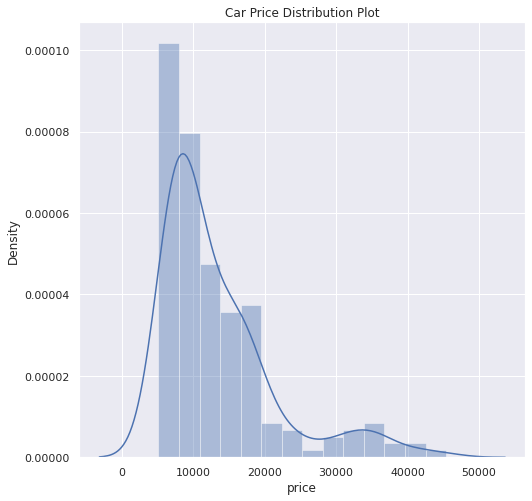

In [342]:
#visualizing car prices

plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

#Visualizing Numeric columns

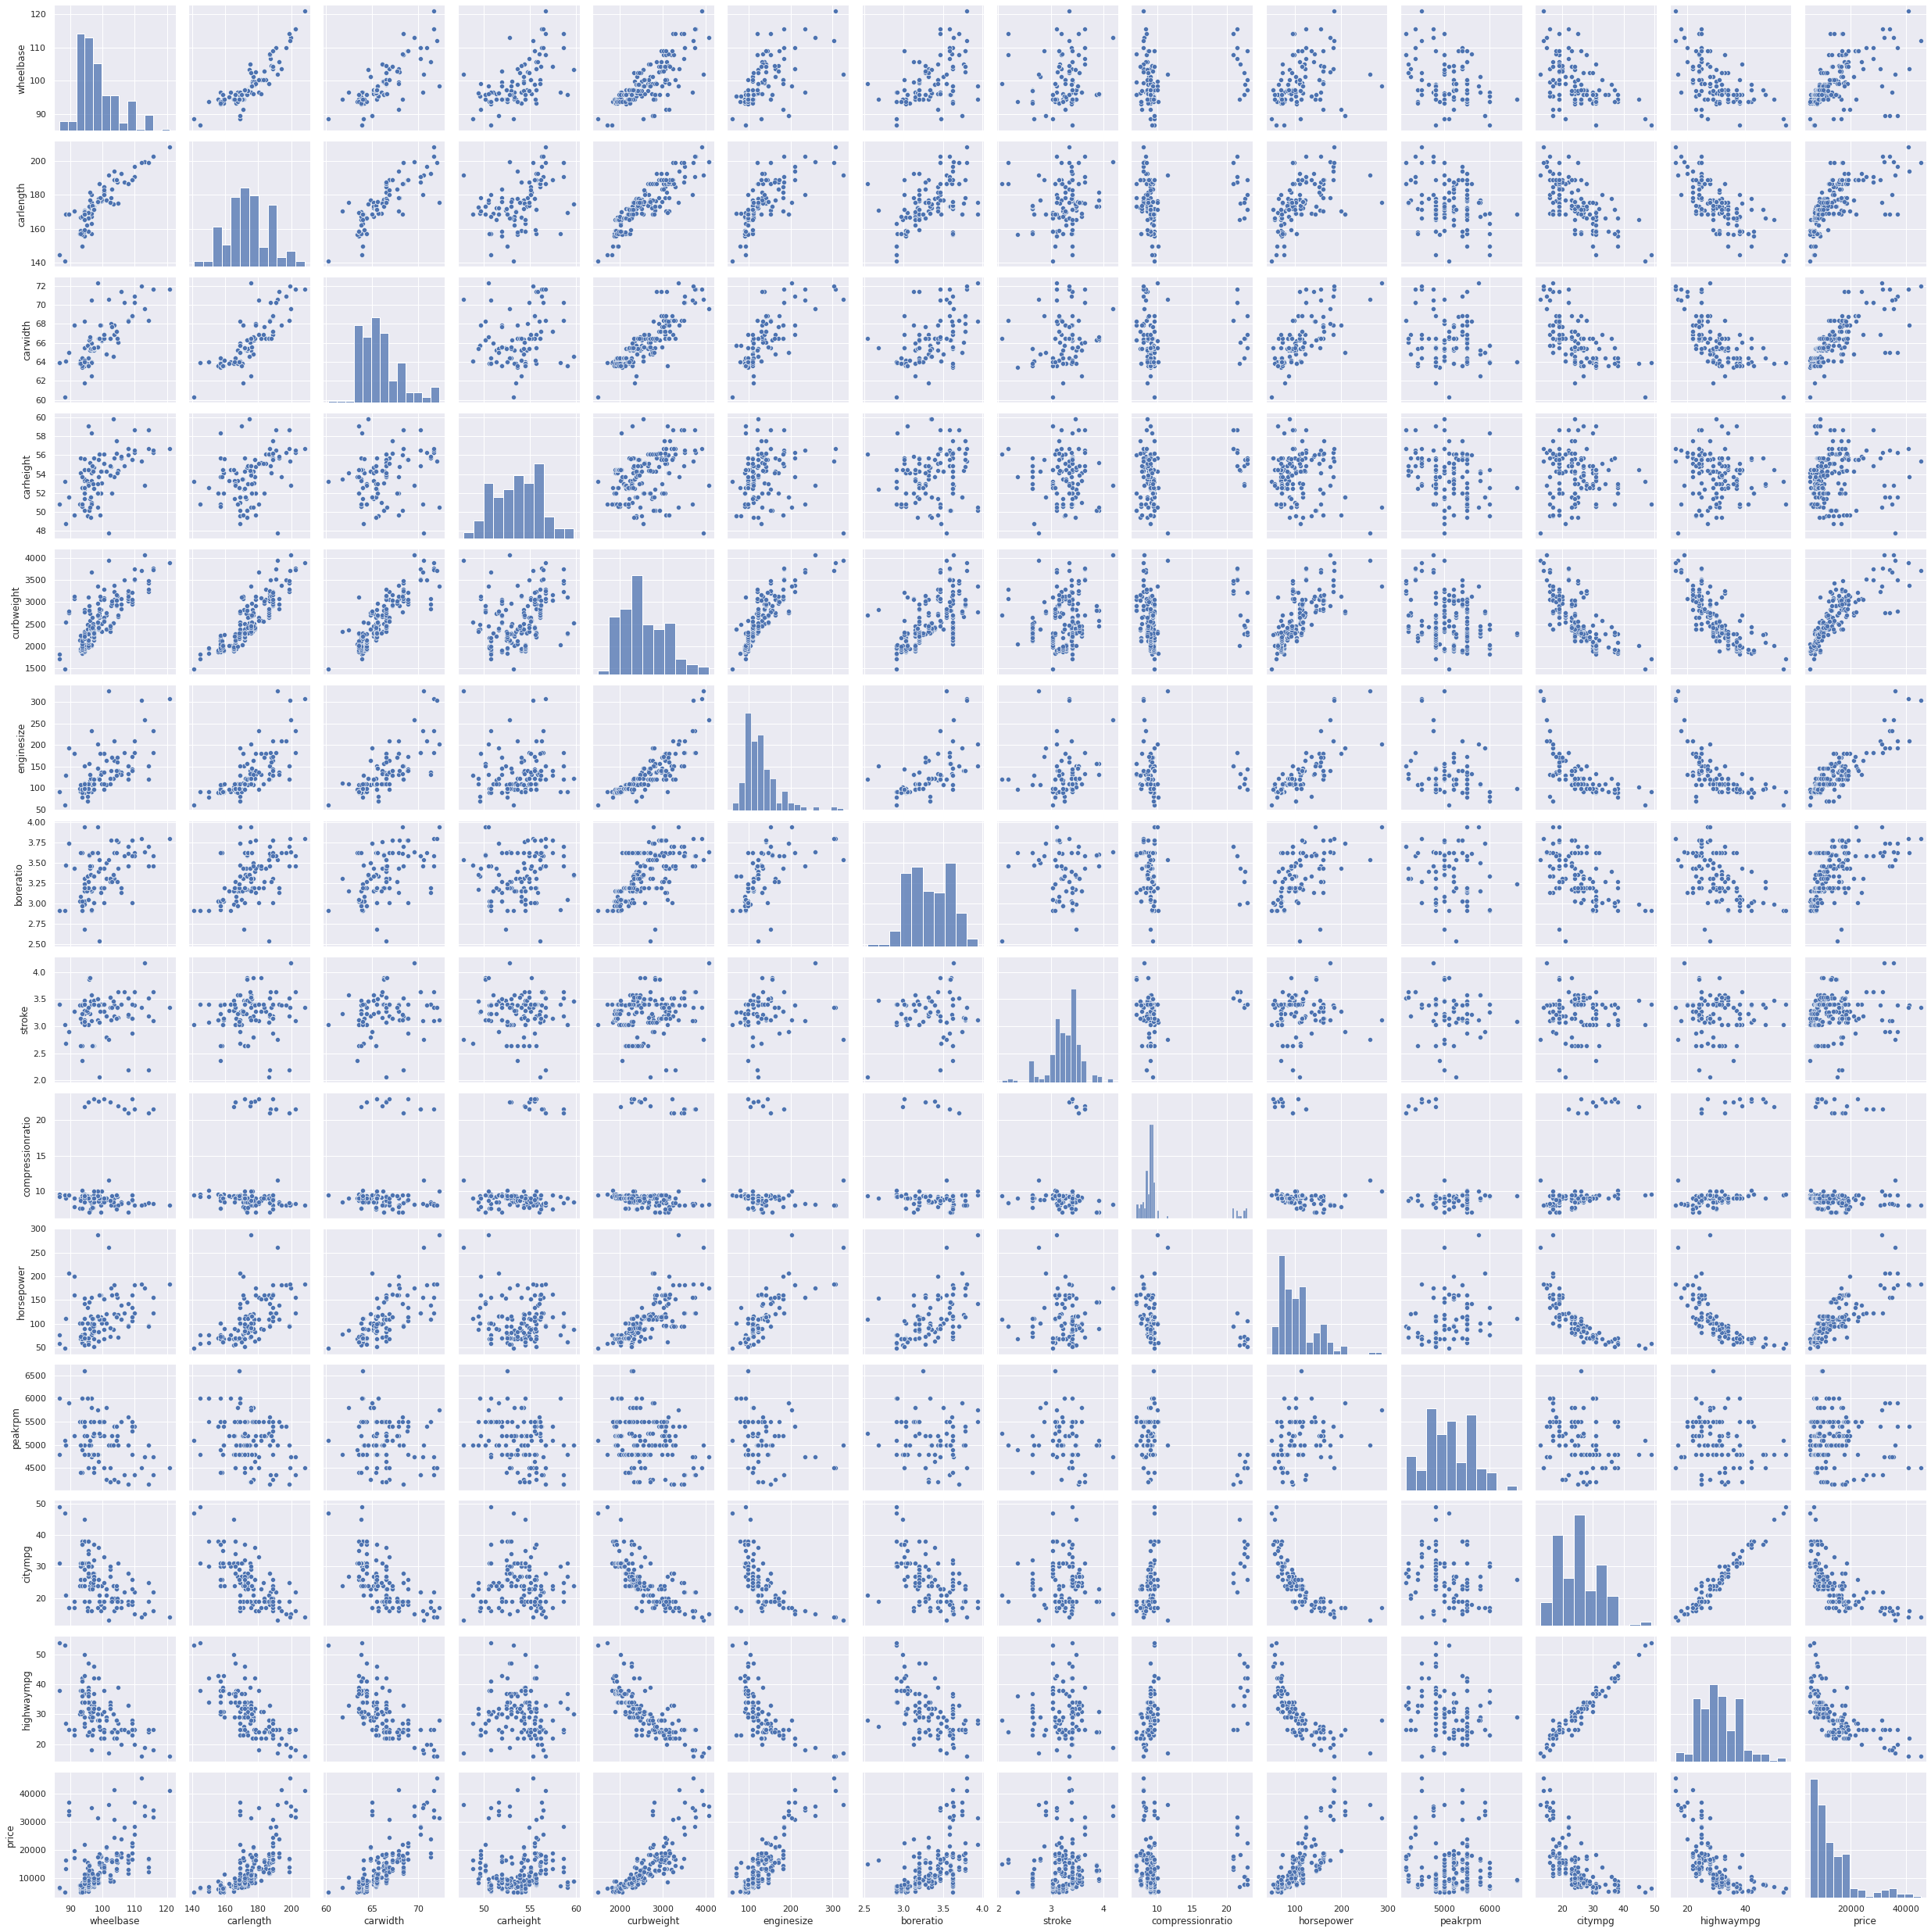

In [343]:
#visualizing corelation of features using pairplot

ax = sns.pairplot(df[num_col])

- carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
- carheight doesn't show any significant trend with price.
- citympg , highwaympg - seem to have a significant negative correlation with price.


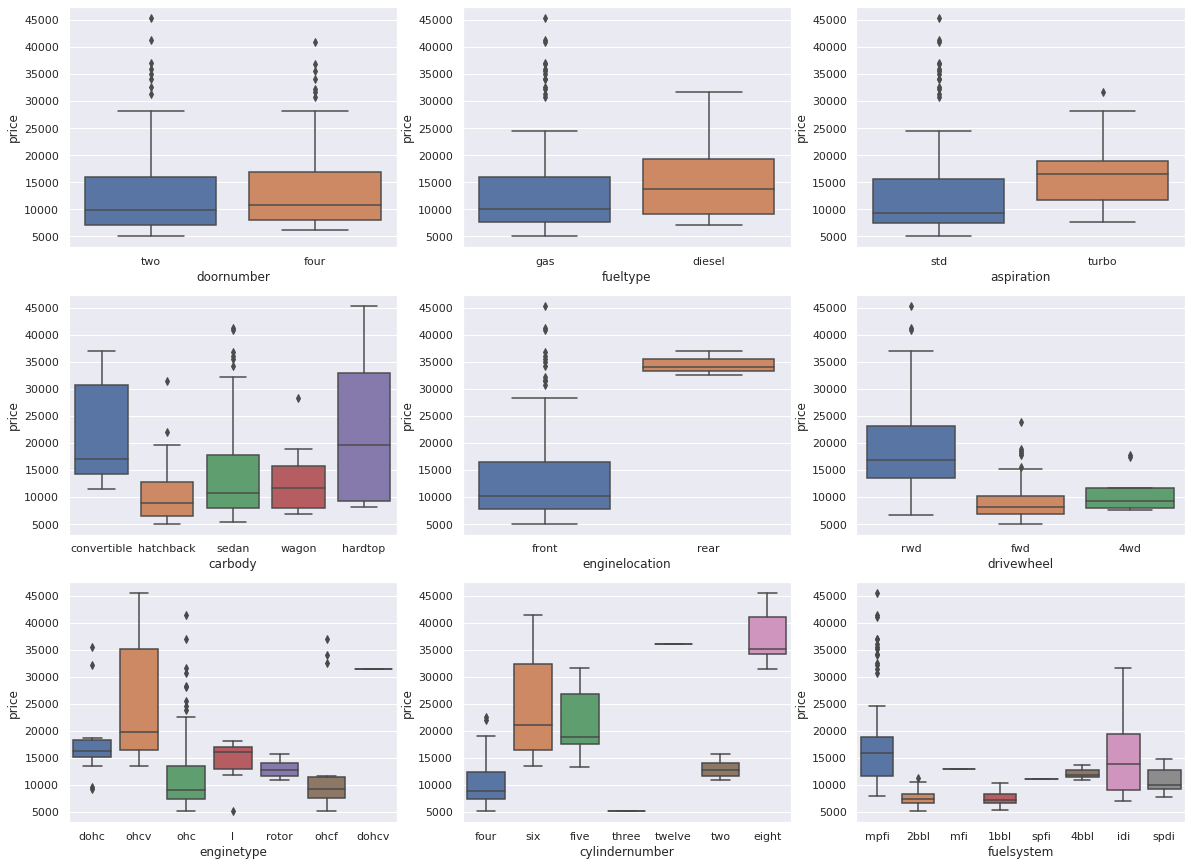

In [344]:
#visualzing categorical features
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.

- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

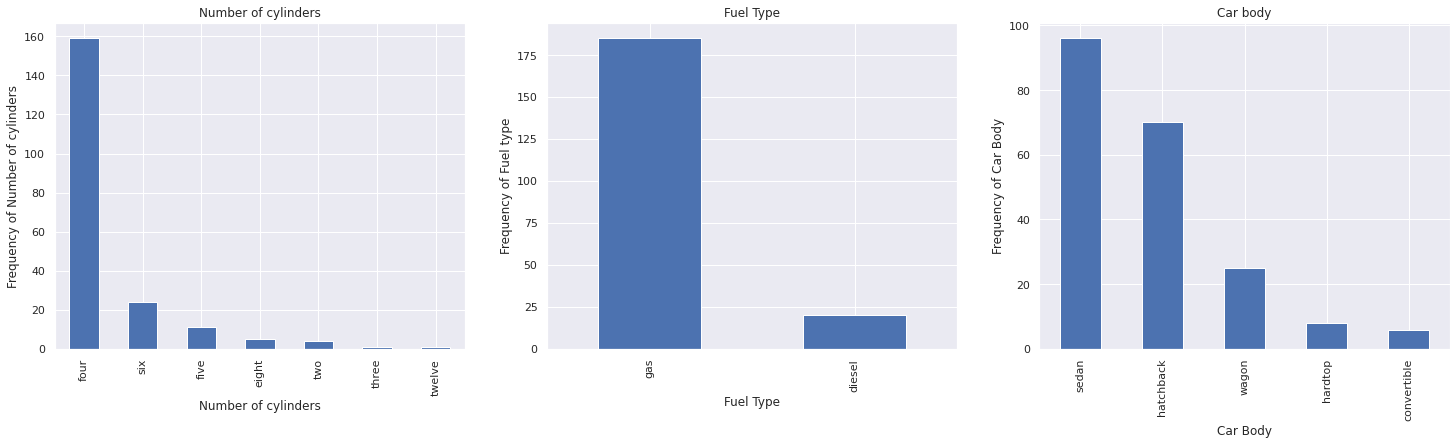

In [345]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind = 'bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind = 'bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

- The number of cylinders used in most cars is four.
- Number of Gas fueled cars are way more than diesel fueled cars.
- Sedan is the most prefered car type.

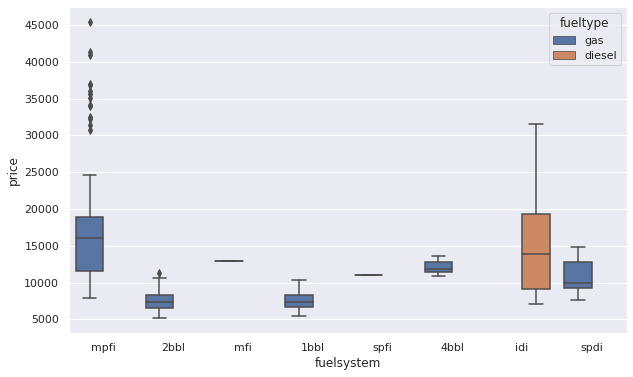

In [346]:
#relationship between fuelsystem and fueltype

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

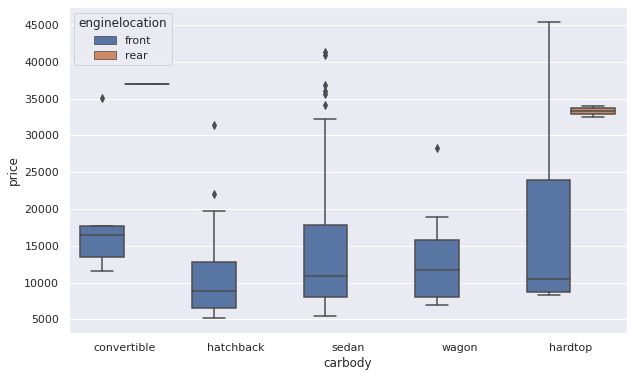

In [347]:
#relationship between carbody and enginelocation
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

In [306]:
#relationshiop between cylinder number and fuel type

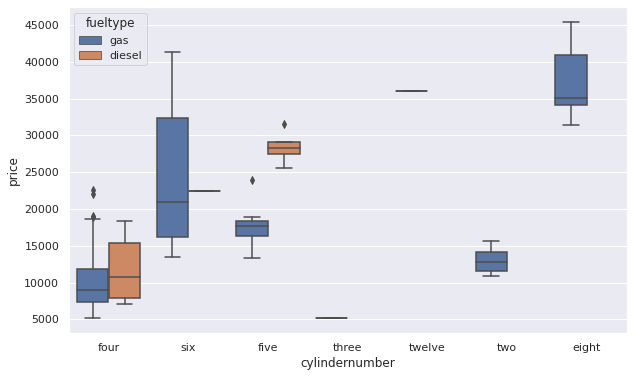

In [348]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

<Figure size 1440x432 with 0 Axes>

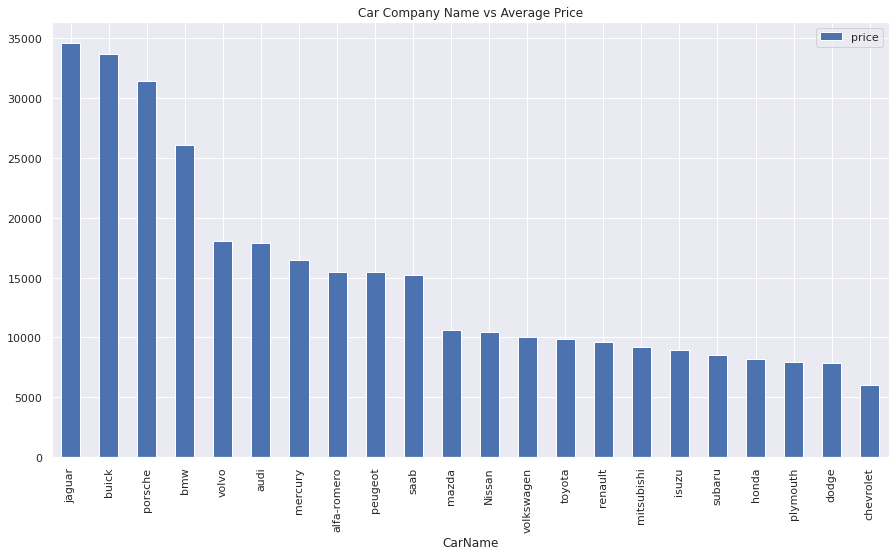

In [349]:
#visualizing avg price of car per company 

plt.figure(figsize=(20, 6))

df_avgprice = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_avgprice.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 1440x432 with 0 Axes>

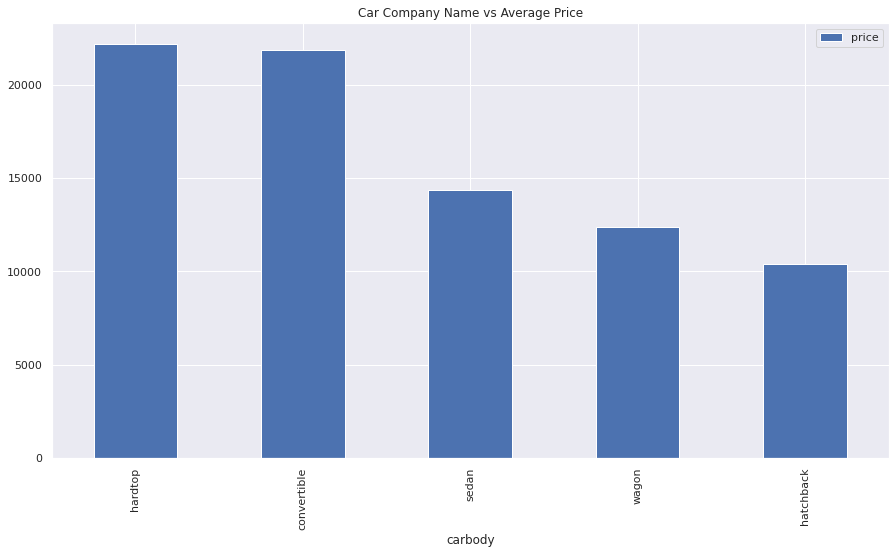

In [350]:
#visualizing  avg car price with relation to bodytype 
plt.figure(figsize=(20, 6))

df_APbody = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_APbody.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [352]:
from pandas.io.formats.info import DataFrameInfo
#Binning the Car Companies based on avg prices of each car Company.
#reassigning price with type int
df['price'] = df['price'].astype('int')
#creating temporary copy of dataframe
df_temp = df.copy()

#grouping by avg price of brands 
t = df_temp.groupby(['CarName'])['price'].mean()

#reseting index to carMame
df_temp = df_temp.merge(t.reset_index(), how='left',on='CarName')

#creating bins with range of price and labelling bins 
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']

#creating new col to show category odf cars 
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


In [353]:
features = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [354]:
df = df[features]

In [355]:
cat_features = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
dummies = pd.get_dummies(df[cat_features])
dummies.shape




(205, 29)

In [356]:
dummies = pd.get_dummies(df[cat_features], drop_first = True)
dummies.shape

(205, 22)

In [357]:

df = pd.concat([df, dummies], axis = 1)

df.drop( cat_features, axis = 1, inplace = True)
df.shape

(205, 32)

#splitting into train and test data

In [358]:
df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
201,19045,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
202,21485,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
203,22470,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [154]:
#checking corelation of variables with train test 70 - 30

#np.random.seed(0)
#df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [359]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [360]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,7738,95.7000,2094,98,3.1900,70,38,47,166.3000,64.4000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
186,8495,97.3000,2275,109,3.1900,85,27,34,171.7000,65.5000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
59,8845,98.8000,2385,122,3.3900,84,26,32,177.8000,66.5000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
165,9298,94.5000,2265,98,3.2400,112,26,29,168.7000,64.0000,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
140,7603,93.3000,2240,108,3.6200,73,26,31,157.3000,63.8000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [221]:
df_test.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'carlength', 'carwidth',
       'Cars_Category_Medium_Range', 'Cars_Category_TopNotch_Cars',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [361]:
#scaling the numerical features
scaler = preprocessing.StandardScaler()

num_features = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
df_train[num_features] = scaler.fit_transform(df_train[num_features])   

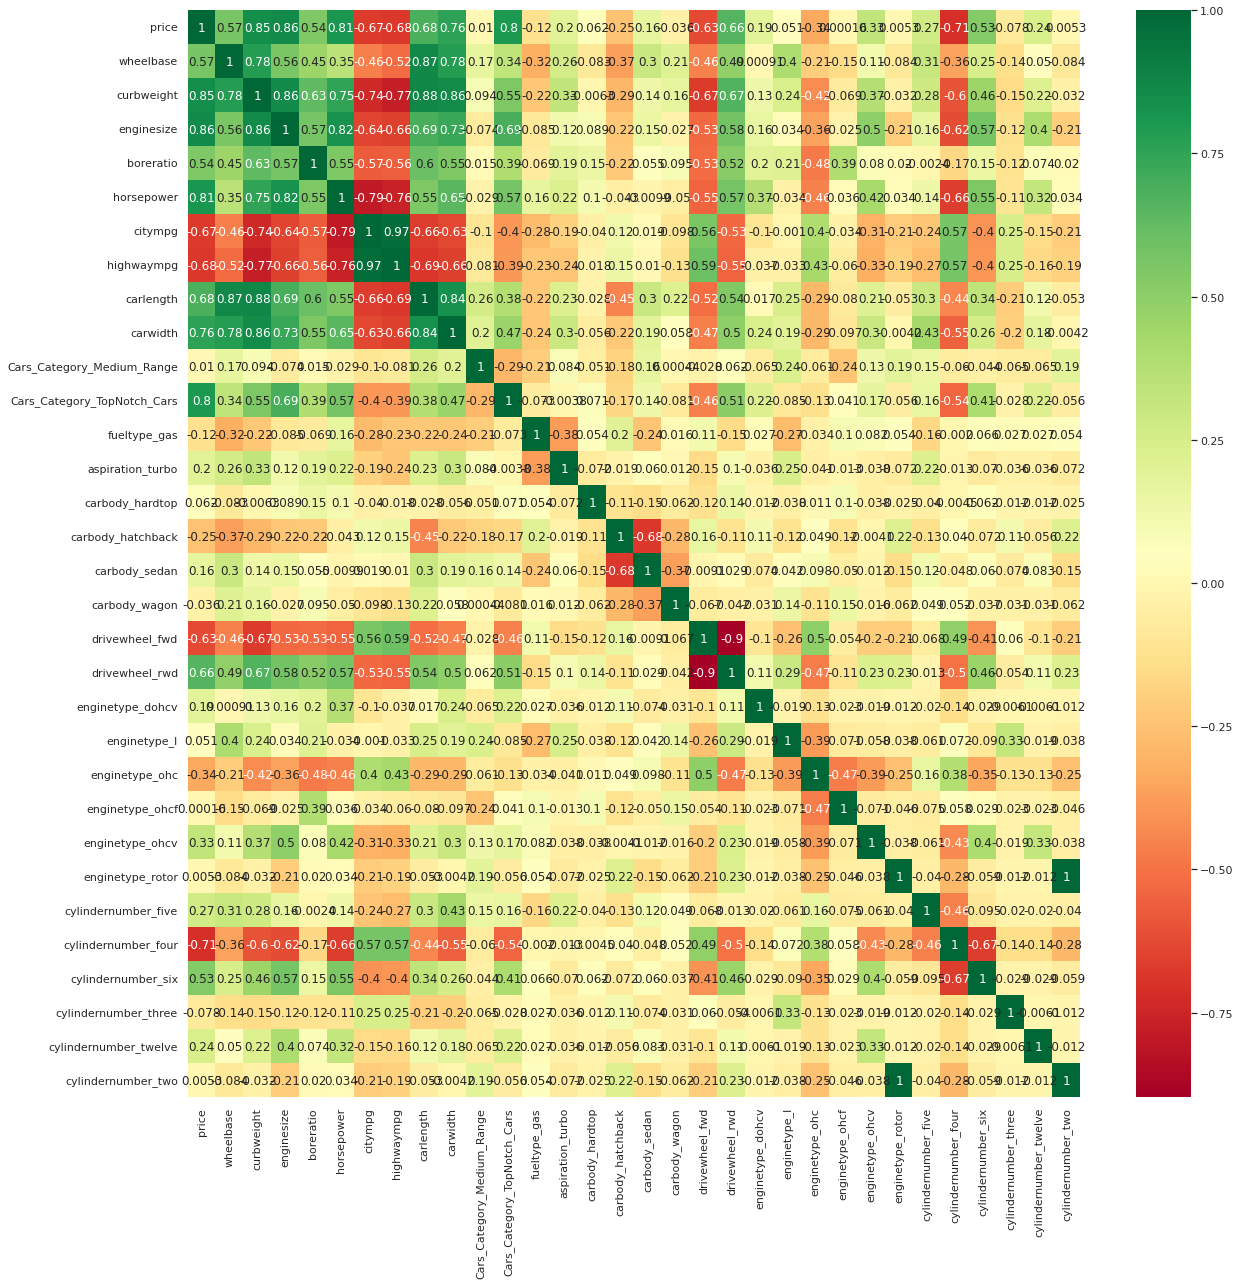

In [362]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn", annot = True)
plt.show()

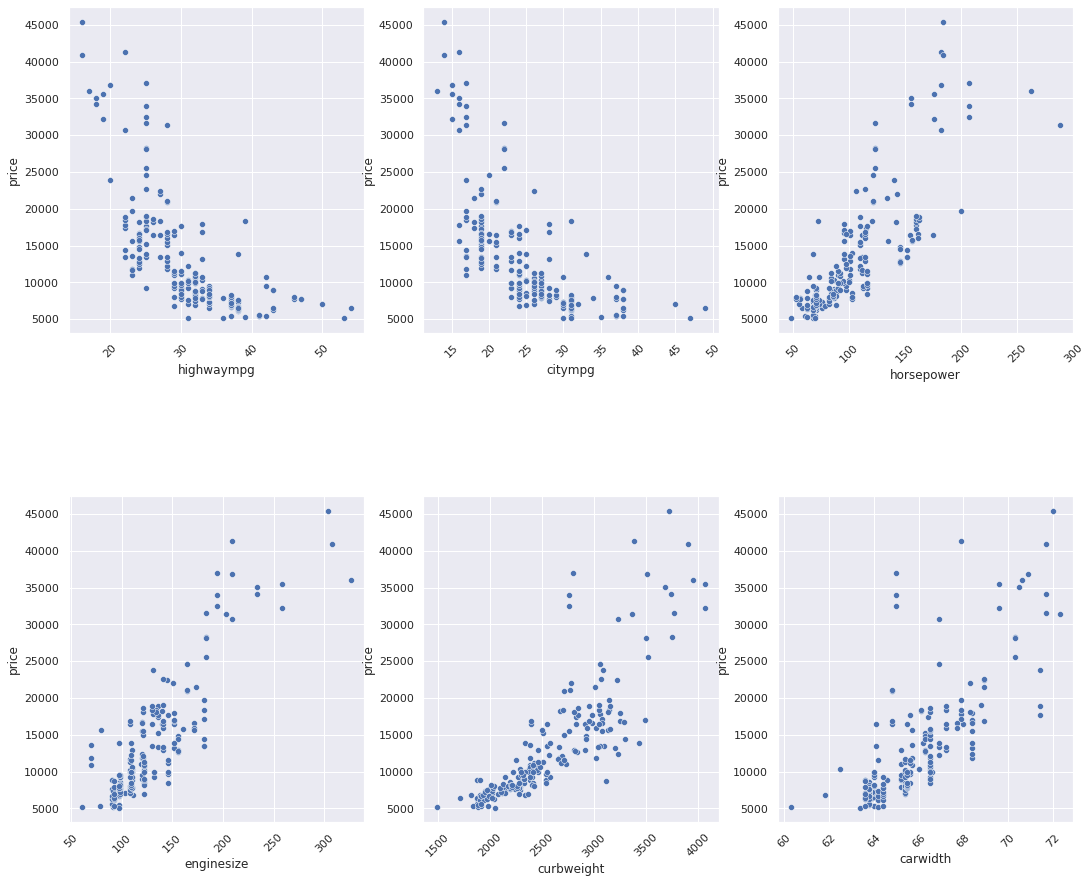

In [363]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [ ]:
#dividing into X and y 

In [364]:
y_train = df_train.pop('price')
X_train = df_train

In [366]:
X_train_1 = X_train['horsepower']

In [367]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [368]:
lr_1.params

const        0.0000
horsepower   0.8126
dtype: float64

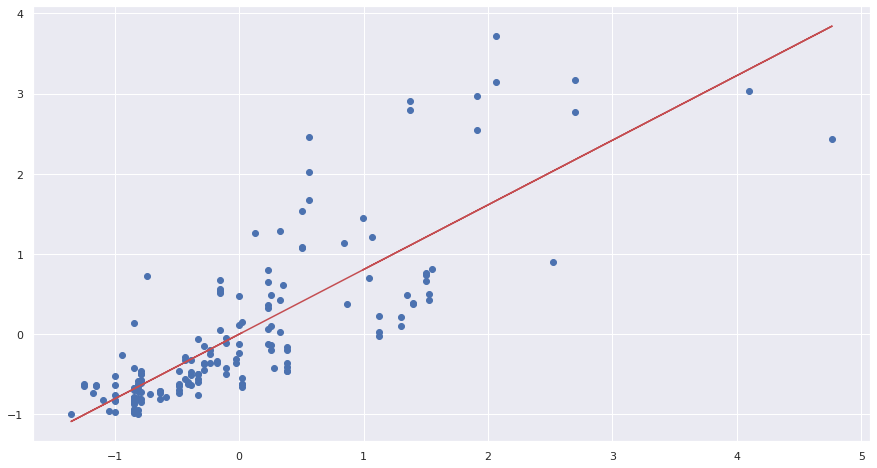

In [369]:
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [370]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     314.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           7.96e-40
Time:                        13:59:24   Log-Likelihood:                -144.16
No. Observations:                 164   AIC:                             292.3
Df Residuals:                     162   BIC:                             298.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e-17      0.046   1.17e-15      1.0

The R-squared value obtained is 0.66. Since we have so many variables, we can clearly do better than this. So adding  the other highly correlated variable,curbweight

In [371]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [372]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [373]:
lr_2.params

const        0.0000
horsepower   0.4067
curbweight   0.5392
dtype: float64

In [374]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     296.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.15e-54
Time:                        14:00:12   Log-Likelihood:                -106.19
No. Observations:                 164   AIC:                             218.4
Df Residuals:                     161   BIC:                             227.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e-17      0.036   1.48e-15      1.0

- Rsquared has increased to 0.78
- Adding another variable

In [376]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [377]:
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()
lr_3.params


const        0.0000
horsepower   0.2721
curbweight   0.3485
enginesize   0.3379
dtype: float64

In [378]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     223.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.60e-57
Time:                        14:00:40   Log-Likelihood:                -97.678
No. Observations:                 164   AIC:                             203.4
Df Residuals:                     160   BIC:                             215.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.98e-17      0.035    2.3e-15      1.0

- R squared has increased to 0.80 using hand picked features
- using Recursive feature elimination instead to shortlist features

In [379]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)


In [380]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 5),
 ('highwaympg', False, 10),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 2),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 14),
 ('aspiration_turbo', False, 15),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 11),
 ('drivewheel_rwd', False, 6),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 17),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 4),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', False, 3),
 ('cylindernumber_two', False, 16)]

In [381]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four'],
      dtype='object')

In [383]:
X_train_rfe = X_train[col_sup]

In [176]:
X_train_rfe.columns

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four'],
      dtype='object')

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [384]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           2.59e-81
Time:                        14:06:23   Log-Likelihood:                -4.5365
No. Observations:                 164   AIC:                             41.07
Df Residuals:                     148   BIC:                             90.67
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- high p-value enginetype_ohcv enginetype1 enginetype_ohcf                 

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
and we need to drop it

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [385]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [179]:
vif

,Features,VIF
10,enginetype_ohc,19.5600
14,cylindernumber_four,14.5800
0,curbweight,9.1200
6,carbody_sedan,7.2000
2,carwidth,5.2500
5,carbody_hatchback,4.8800
1,horsepower,4.6100
7,carbody_wagon,3.1400
11,enginetype_ohcf,2.9500
3,Cars_Category_TopNotch_Cars,2.4900


Highest Vif: enginetype ohc, cylinder num 4, 

In [386]:
# Dropping enginetype_ohc with highest P value and VIF(0.127/19.56)

X_train_rfe1 = X_train_rfe.drop('enginetype_ohc', axis = 1)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     152.3
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.08e-80
Time:                        14:07:36   Log-Likelihood:                -8.9475
No. Observations:                 164   AIC:                             47.89
Df Residuals:                     149   BIC:                             94.39
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [387]:
# Dropping enginetype_ohcf with p-val 0.974

X_train_rfe2 = X_train_rfe1.drop('enginetype_ohcf', axis = 1)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     165.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           8.21e-82
Time:                        14:08:23   Log-Likelihood:                -8.9481
No. Observations:                 164   AIC:                             45.90
Df Residuals:                     150   BIC:                             89.29
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [388]:
#enginetype_l p-val = 0.753

# Dropping enginetype_l 

X_train_rfe3 = X_train_rfe2.drop('enginetype_l', axis = 1)

# Adding a constant variable and Build a third fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe_3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     180.0
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.28e-83
Time:                        14:08:34   Log-Likelihood:                -9.0024
No. Observations:                 164   AIC:                             44.00
Df Residuals:                     151   BIC:                             84.30
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [389]:
#dropping cylindernumber_five p-val = 0.88 , looking for features with pval lesser than 0.05\

X_train_rfe4 = X_train_rfe3.drop('cylindernumber_five', axis = 1)

# Adding a constant variable and Build a third fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     193.6
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.91e-83
Time:                        14:08:42   Log-Likelihood:                -10.604
No. Observations:                 164   AIC:                             45.21
Df Residuals:                     152   BIC:                             82.41
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [390]:
#dropping enginetype_ohcv p-val = 0.058 , looking for features with pval lesser than 0.05

X_train_rfe5 = X_train_rfe4.drop('enginetype_ohcv', axis = 1)

# Adding a constant variable and Build a third fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     208.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           7.72e-84
Time:                        14:09:00   Log-Likelihood:                -12.546
No. Observations:                 164   AIC:                             47.09
Df Residuals:                     153   BIC:                             81.19
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [391]:
#checking VIFs of features, selecting features with VIF < 5

vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,7.3400
9,cylindernumber_four,6.9000
2,carwidth,4.5000
6,carbody_sedan,3.8700
1,horsepower,3.8000
5,carbody_hatchback,2.8700
7,carbody_wagon,1.9700
3,Cars_Category_TopNotch_Cars,1.8500
8,enginetype_dohcv,1.4100
4,carbody_hardtop,1.2300


In [186]:
# Dropping curbweight as VIF is 7.34

X_train_rfe6 = X_train_rfe5.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     213.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           2.66e-82
Time:                        12:41:18   Log-Likelihood:                -19.273
No. Observations:                 164   AIC:                             58.55
Df Residuals:                     154   BIC:                             89.54
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [187]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_four,6.9000
5,carbody_sedan,3.8700
4,carbody_hatchback,2.7700
0,horsepower,2.6700
1,carwidth,2.0900
6,carbody_wagon,1.8400
2,Cars_Category_TopNotch_Cars,1.7600
3,carbody_hardtop,1.2200
7,enginetype_dohcv,1.2200


In [392]:
# Dropping ccylindernumber_four	with VIF 6.9000

X_train_rfe7 = X_train_rfe6.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     222.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           7.19e-81
Time:                        14:10:21   Log-Likelihood:                -25.723
No. Observations:                 164   AIC:                             69.45
Df Residuals:                     155   BIC:                             97.34
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [393]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4000
1,carwidth,1.9800
2,Cars_Category_TopNotch_Cars,1.7200
5,carbody_sedan,1.2100
7,enginetype_dohcv,1.1900
4,carbody_hatchback,1.0900
3,carbody_hardtop,1.0500
6,carbody_wagon,1.0200


Lets drop carbody_sedan and see if there is any drastic fall in R squared.If not we can drop carbody sedan. Our aim is to explain the maximum variance with minimum variable.

In [394]:
X_train_rfe8 = X_train_rfe7.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     229.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           8.96e-79
Time:                        14:10:48   Log-Likelihood:                -33.773
No. Observations:                 164   AIC:                             83.55
Df Residuals:                     156   BIC:                             108.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

with dropping carbody_sedan, R2 score has only dropped by 0.008 (0.920 to 0.912), good to proceed with dropping carbody_sedan 

In [191]:
#dropping carbody_hardtop as p val is 0.760

X_train_rfe9 = X_train_rfe8.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     269.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.48e-80
Time:                        12:41:19   Log-Likelihood:                -33.822
No. Observations:                 164   AIC:                             81.64
Df Residuals:                     157   BIC:                             103.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [395]:
#dropping carbody_wagon as pval is 0.297
X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     323.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.98e-81
Time:                        14:11:37   Log-Likelihood:                -34.392
No. Observations:                 164   AIC:                             80.78
Df Residuals:                     158   BIC:                             99.38
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#R2 score for training is 0.911

In [397]:
#checking VIF for present features
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.1600
1,carwidth,1.8600
2,Cars_Category_TopNotch_Cars,1.4600
4,enginetype_dohcv,1.1900
3,carbody_hatchback,1.0900


All VIFs and P values are within threshold , features shortlisted via rfe = horsepower, carwidth, topnotch cars, hatchback and enginetype_dohcv 

Text(0.5, 0, 'Errors')

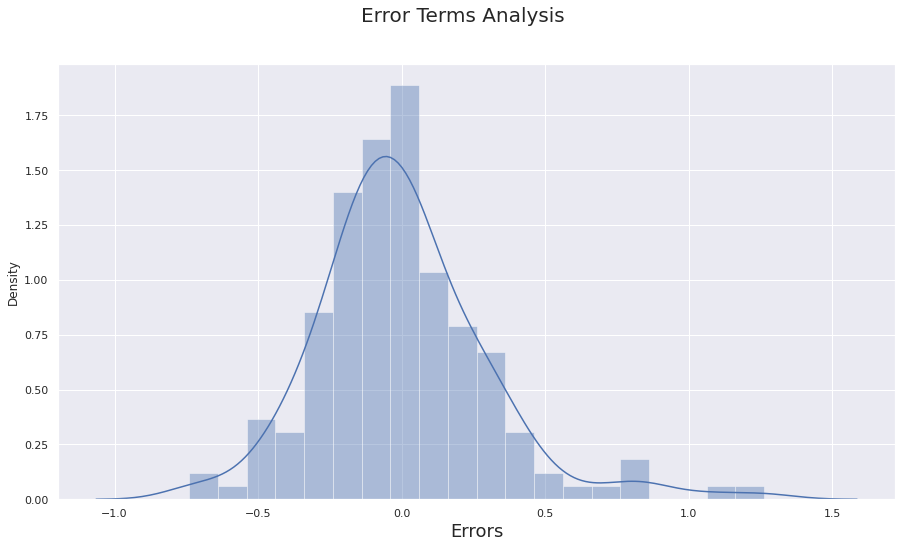

In [398]:
#predicting price using the 5 shortlisted features 
#visualizing distribution of errors as normal distribution is an assumption of linear regression 

# Predicting the price of training set.
y_predict = lm_rfe10.predict(X_train_rfe10c)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_predict), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [399]:
df_test.columns
#num_col = ['carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
#df_test[num_col] = scaler.transform(df_test[num_col])
#df_test.shape

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth',
       'Cars_Category_Medium_Range', 'Cars_Category_TopNotch_Cars',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [400]:
#num_col = ['carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
#df_test[num_col] = scaler.transform(df_test[num_col])
#df_test.shape

In [401]:
num_features = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
#df_test[num_features] = scaler.transform(df_test[num_features])
#df_test.shape

In [402]:
df_test[num_features] = scaler.transform(df_test[num_features])
df_test.shape

(41, 32)

Dividfing into train and test

In [403]:
y_test = df_test.pop('price')
X_test = df_test
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [404]:
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)

Model evaluation 

Text(0, 0.5, 'y_pred')

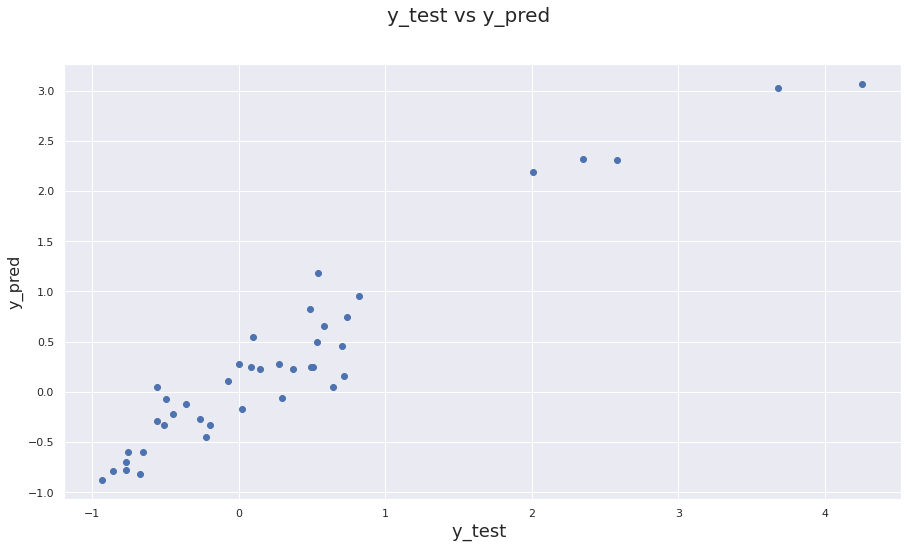

In [405]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [406]:
r2_score(y_test, y_pred)

0.9108288580600101

#R2 scores

- R2 score of test is 0.910 and R2 score of train is 0.911
- model is prepared to predict car price using features horsepower,	carwidth, Cars_Category_TopNotch_Cars,enginetype_dohcv,carbody_hatchback

- Equation of line to predict Car prices 

- CarPrice = coeff of Constant + (coeff of hp * hp) + (coeff of Carwidth * carwidth) + (coeff of carscategory_top_notch * carscategory_topnotch ) + (coeff of enginetype_dohcv * enginetype_dohcv ) + (coeff of carbody_hatchback * carbody_hatchback) 

- Carprice = -0.0878 + (0.4049 * hp) + (0.3050 * carwidth) + (1.4107 * carscategory_topnotch) - (0.1681 * enginetype_dohcv) - (1.5002 * carbody_hatchback)